In [5]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
from gnss_analysis.io import rinex
from gnss_analysis import filters, solution, locations
import matplotlib.pyplot as plt
import numpy as np

In [7]:
rover_observation_file = '../tests/test_data/short_baseline_cors_stable_satellites/seat0010/seat0010.16o'
rover_navigation_file = '../tests/test_data/short_baseline_cors_stable_satellites/seat0010/seat0010.16n'
base_observation_file = '../tests/test_data/short_baseline_cors_stable_satellites/ssho0010/ssho0010.16o'
observations = rinex.simulate_from_rinex(rover_observation_file, rover_navigation_file, base_observation_file)

In [8]:
rover_lines = rinex.iter_padded_lines(rover_observation_file)
rover_header = rinex.parse_header(rover_lines)
base_lines = rinex.iter_padded_lines(base_observation_file)
base_header = rinex.parse_header(base_lines)
rover_pos = np.array([rover_header['x'],
                    rover_header['y'],
                    rover_header['z']])
base_pos = np.array([base_header['x'],
                   base_header['y'],
                   base_header['z']])
expected_baseline = rover_pos - base_pos

In [9]:
dgnss_filter = filters.KalmanFilter(base_pos=base_pos,
                                    sig_x=2.,
                                    sig_z=10.,
                                    sig_cp=0.02,
                                    sig_pr=3.)

In [10]:
# Can't handle dropped sats yet so only run for 390 seconds
nIterations = 390
baselines = np.zeros((nIterations, 3))
for i, x in enumerate(solution.solution(observations, dgnss_filter)):
    if i == nIterations:
        break
    baselines[i] = x['rover_pos'].get('baseline', None)

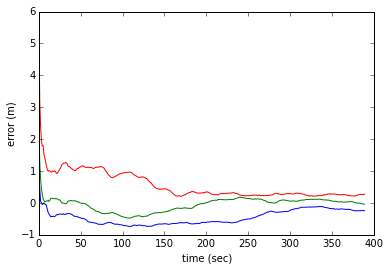

In [11]:
plt.plot(baselines - expected_baseline)
plt.xlabel('time (sec)')
plt.ylabel('error (m)')